# Face detection with OpenCV



OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. In this work we will be testing the Haar Cascade Algorithm & LBP (Local Binary Patterns) Cascade Algorithm.

- Find out more about openCV at: <a> https://opencv.org/ </a>

### Operating requirements

The development environment (Python notebook) must have the following libraries installed:
    - OpenCV
    - Matplotlib
    - Time (default)
    
In order to install OpenCV you must have installed the following in Anaconda Prompt:
    - conda install opencv
    - python -m pip install --upgrade pip
    - conda install -c menpo opencv
    - jupyter nbextension enable --py widgetsnbextension
    - conda install -c conda-forge matplotlib 
    

##### Please have into account all paths might change depending on the user's directory

### 1. Import required libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import time
import glob
%matplotlib inline

### 2. Functions


In [2]:
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def detect_faces(classifier, colored_img, scaleFactor = 1.1):
    """
    @P1: classifier --> classifier: Haar Cascade | LBP Cascade
    @P2: colored_img --> cv2 read image
    @P3: scaleFactor --> [nullable]. Default= 1.1, 
                            1.1 might find faces where there isn't, 
                            higher means more accurary while fnding a face.
                            ScarleFactor > 1
    Returns: image [face]
    """

    # We make a copy of the original image so the original remains unchanged
    img_copy = colored_img.copy()          
 
    # Convert the test image to gray image as - opencv face detector expects gray images -
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          
 
    # let's detect multiscale (some images may be closer to camera than others) images
    faces = classifier.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE);          
            
    
    cont = 1
    for (x, y, w, h) in faces:
        print("* Face", cont)
        # cv2.rectangle(colored_img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = colored_img[y:y+h, x:x+w]

        # Set region of interest for smiles
            
        cont = cont+1
    # Go over list of faces and draw them as rectangles on original colored img
      
 
    return img_copy

### 3. Classifiers

#### 3.1 Haar Cascade classifier

* Face 1


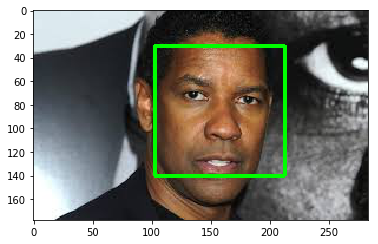

* Face 1


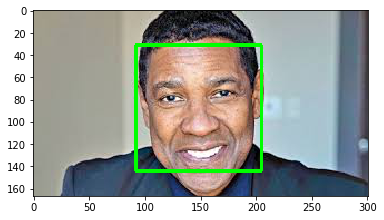

* Face 1


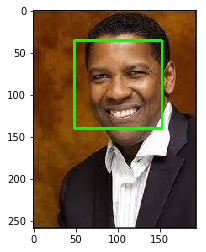

* Face 1


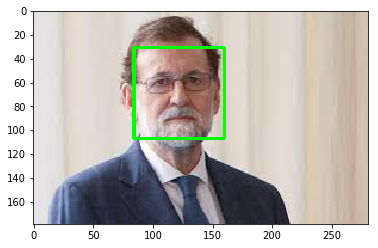

* Face 1


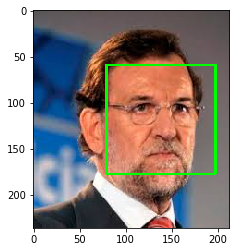

* Face 1


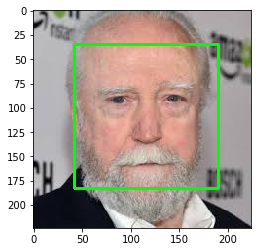

* Face 1


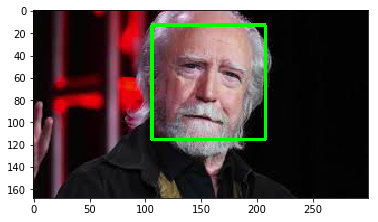

* Face 1


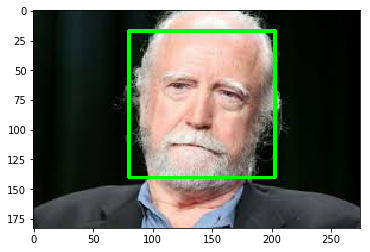

* Face 1


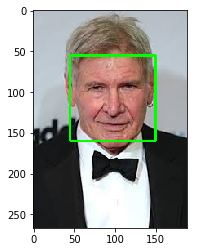

* Face 1


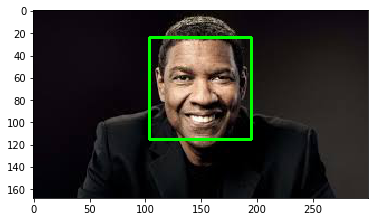

* Face 1


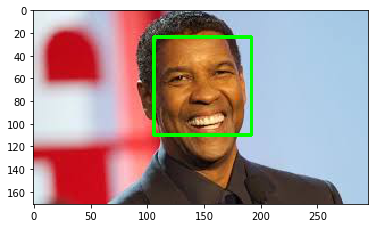

* Face 1
* Face 2


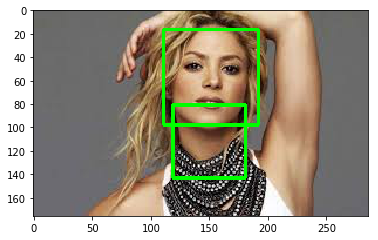

* Face 1


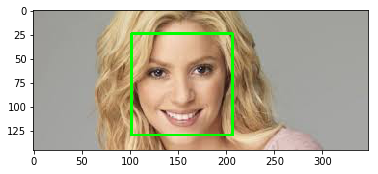

* Face 1


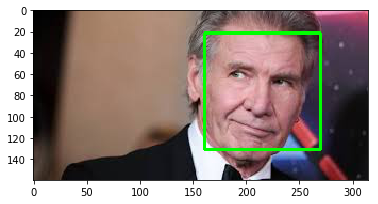

* Face 1


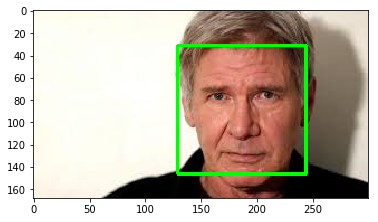

* Face 1


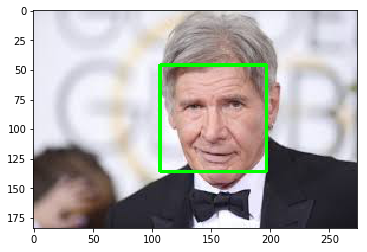

* Face 1


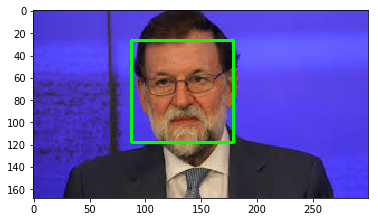

* Face 1


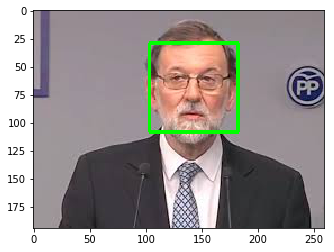

* Face 1


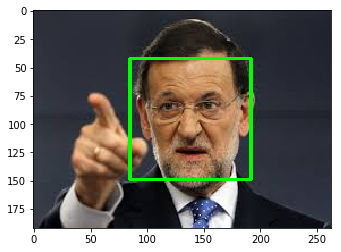

* Face 1


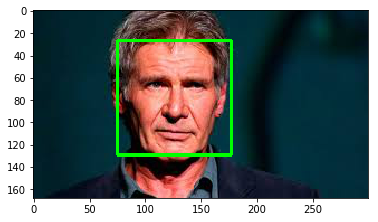

* Face 1


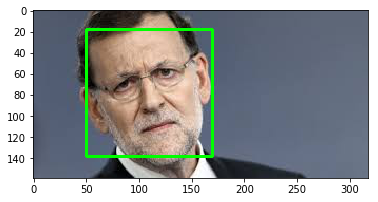

* Face 1


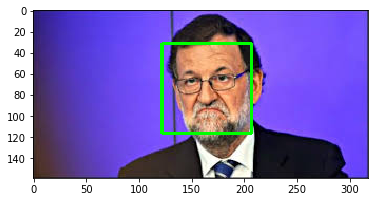

* Face 1


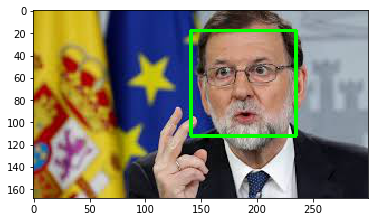

* Face 1


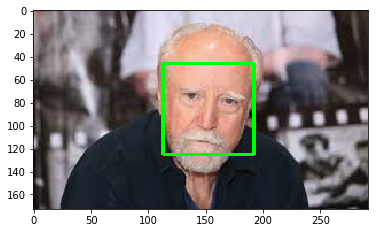

* Face 1


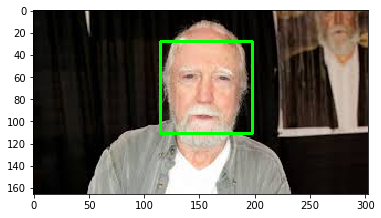

* Face 1


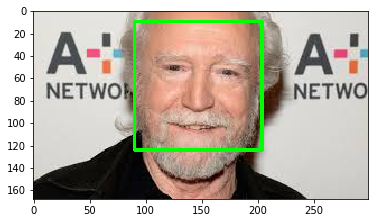

* Face 1


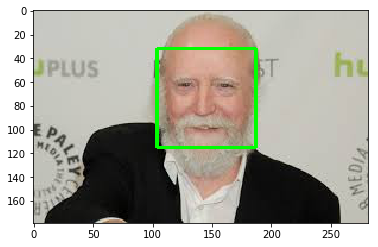

* Face 1


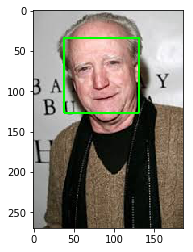

* Face 1


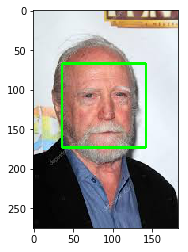

* Face 1


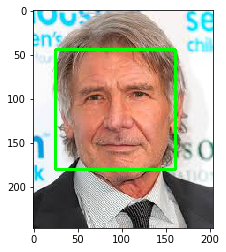

* Face 1


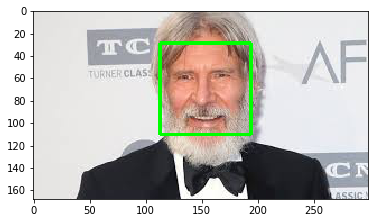

* Face 1


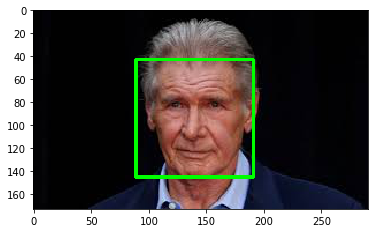

* Face 1


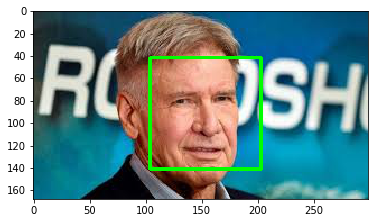

* Face 1


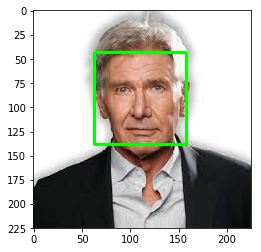

In [3]:
# Path of haarcascade_frontalface_default.xml
path = "libraries\\haarcascade_frontalface_default.xml"

# We create the classifier
haar_face_cascade = cv2.CascadeClassifier(path)

# Read the images
image_paths = glob.glob("Images\\people_detection_test\\*")

#print(image_paths)

for img_path in image_paths:
    img = cv2.imread(img_path)
    # We call the function detect_faces 
    faces_detected_img = detect_faces(haar_face_cascade, img, scaleFactor=1.9)
    # Convert image to RGB and show image 
    plt.imshow(convertToRGB(faces_detected_img))
    plt.show()

#### 3.1 LBP Cascade classifier

* Face 1


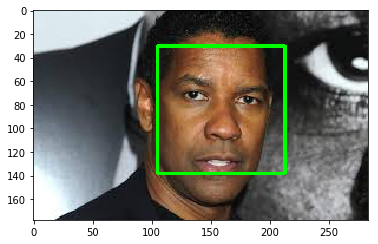

* Face 1


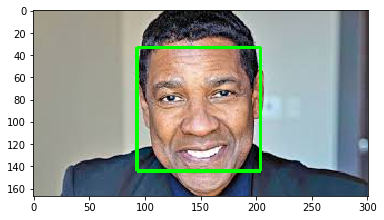

* Face 1


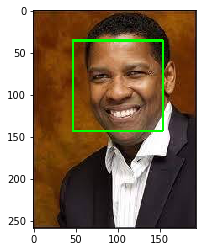

* Face 1


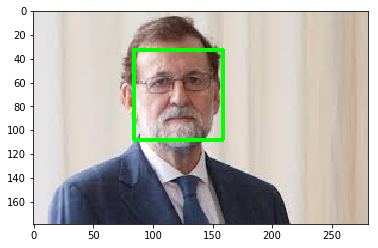

* Face 1


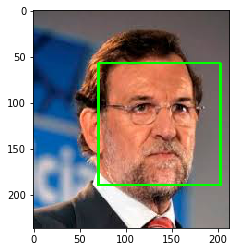

* Face 1


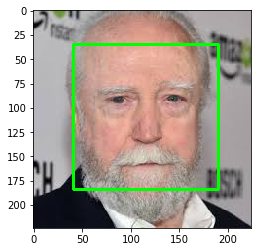

* Face 1


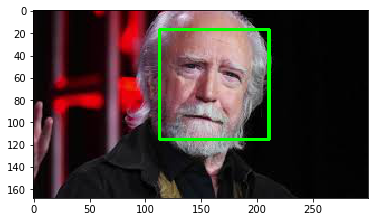

* Face 1


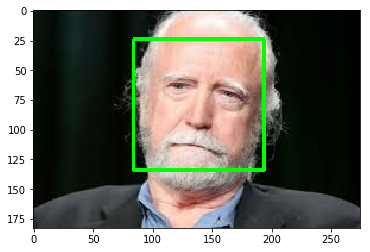

* Face 1


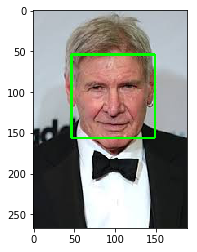

* Face 1


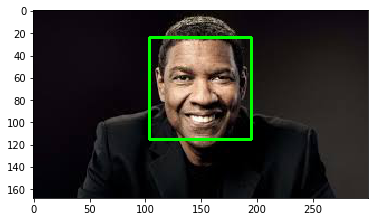

* Face 1


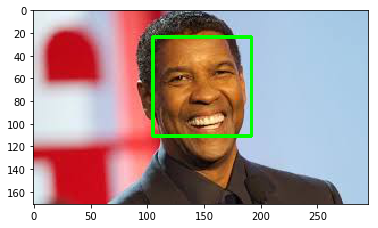

* Face 1


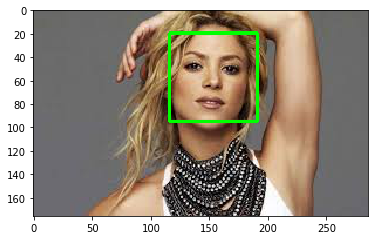

* Face 1


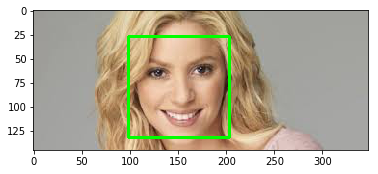

* Face 1


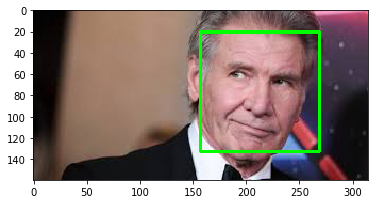

* Face 1


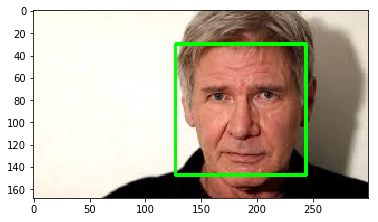

* Face 1


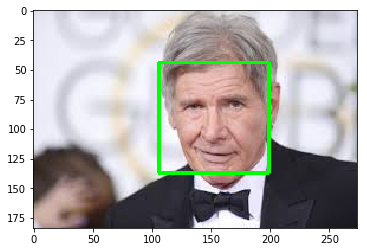

* Face 1


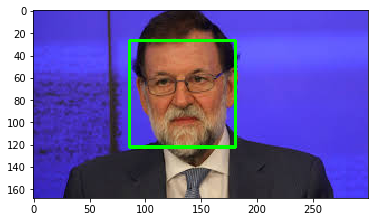

* Face 1


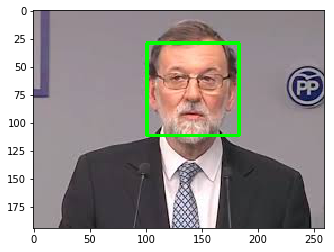

* Face 1


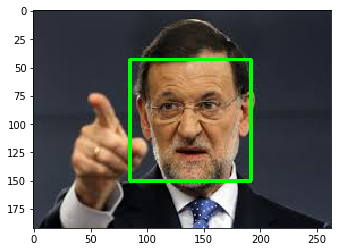

* Face 1


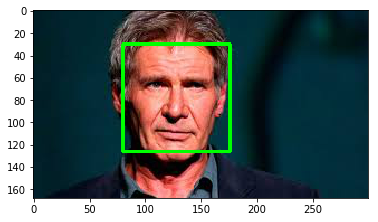

* Face 1


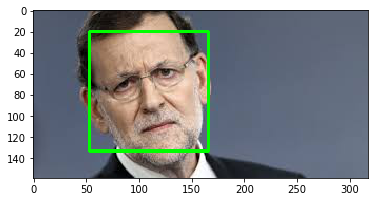

* Face 1


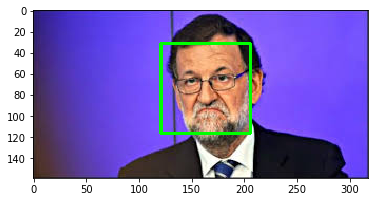

* Face 1


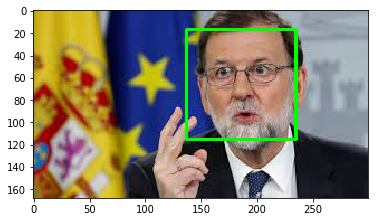

* Face 1


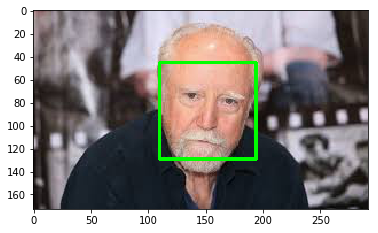

* Face 1


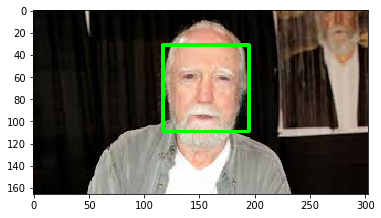

* Face 1


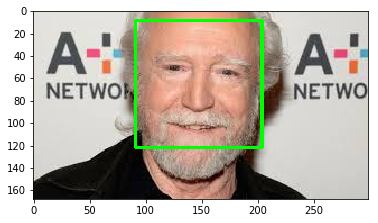

* Face 1


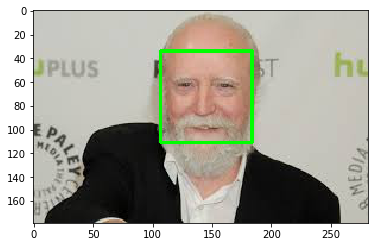

* Face 1


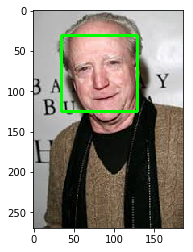

* Face 1


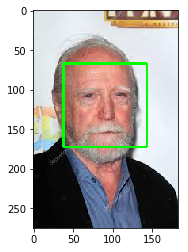

* Face 1


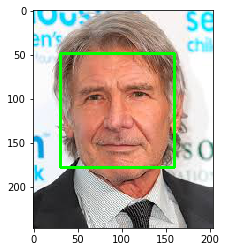

* Face 1


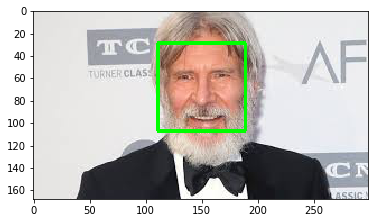

* Face 1


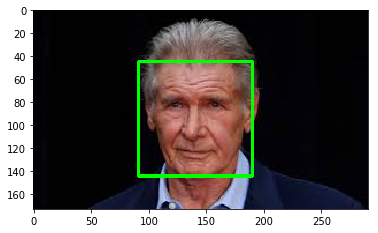

* Face 1


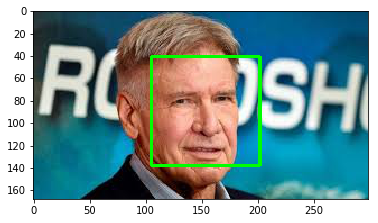

* Face 1


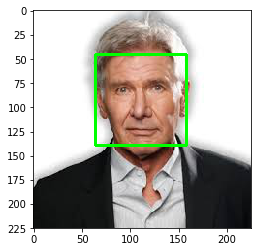

In [4]:
# Path of lbpcascade_frontalface.xml
path = "libraries\\lbpcascade_frontalface.xml"

# We create the classifier
lbp_face_cascade = cv2.CascadeClassifier(path)
#load test image 

for img_path in image_paths:
    img = cv2.imread(img_path)
    # We call the function detect_faces 
    faces_detected_img = detect_faces(lbp_face_cascade, img, scaleFactor=1.9)
    # Convert image to RGB and show image 
    plt.imshow(convertToRGB(faces_detected_img))
    plt.show()

### 4. Compare detection time between Haar & LBP 

##### Haar

In [6]:
# note time before detection 
t1 = time.time()
 
#call our function to detect faces 
haar_detected_img = detect_faces(haar_face_cascade, img)
 
#note time after detection 
t2 = time.time()
#calculate time difference 
dt1 = t2 - t1
#print the time difference



* Face 1


##### LBP

In [7]:
#note time before detection 
t1 = time.time()

#call our function to detect faces 
lbp_detected_img = detect_faces(lbp_face_cascade, img)

#note time after detection 
t2 = time.time()
#calculate time difference 
dt2 = t2 - t1
#print the time difference

* Face 1


### Classification time of Haar & LBP

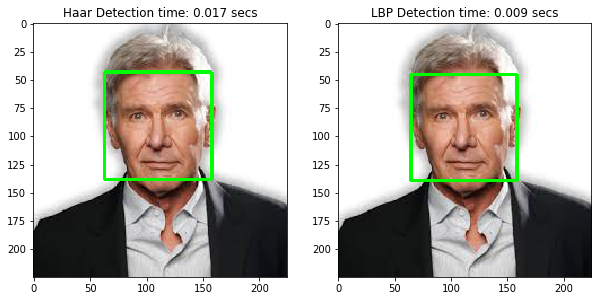

In [8]:
#create a figure of 2 plots (one for Haar and one for LBP) 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  
 
#show Haar image 
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs') 
ax1.imshow(convertToRGB(haar_detected_img))  
 
#show LBP image 
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs') 
ax2.imshow(convertToRGB(lbp_detected_img))  


### 4. Conclusions

- Haar Cascade Face Detection is more accurate
- LBP takes less time running the algorithm
- It's harder to recognize faces with glasses